# Classification Of Brain Tumors - EDA

This notebook is the 2nd Step in creating a working model for Brain Tumor Classification Problem and lists down the following:

1. What is the shape of the data?
2. Is there any relationship between data?

## Step-1: Loading the data and enquiring about the shape of the data

In [1]:
#load required python packages
import os
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
%matplotlib inline

In [2]:
#Print the current working directory
path = os.getcwd()
print(path)

d:\Learning\Springboard\GitHub\Classification-Brain-Tumors


In [3]:
#Updating Path variable so that it points to 'Train' Directory
path = os.path.join(path,'Train')

In [7]:
#Reading Images & Loading the image data from /Train/Yes and Train/No folders in a list

#Create an Empty list to store image data
load_data = list()

#load all images in Yes Directory
for fn in listdir(os.path.join(path,'Yes')):
    #Load the Image in a variable
    img_data = Image.open(os.path.join(path,'Yes',fn))
    #Append the loaded image to the list created
    height, width, layers = list(np.asarray(img_data).shape)
    form = img_data.format
    mode = img_data.mode
    load_data.append([fn, height, width, str(layers), form, mode])

#load all images in No Directory
for fn in listdir(os.path.join(path,'No')):
    #Load the Image in a variable
    img_data = Image.open(os.path.join(path,'No',fn))
    #Append the loaded image to the list created
    height, width, layers = list(np.asarray(img_data).shape)
    form = img_data.format
    mode = img_data.mode
    load_data.append([fn, height, width, str(layers), form, mode])
    

In [5]:
#Creating a Dataframe from the above list
df = pd.DataFrame(load_data, columns = ['img_name', 'height','width','layers','format','mode'])

#Make image_name as the index of the dataframe
df.set_index('img_name', inplace = True)
df.head(5)

,height,width,layers,format,mode
img_name,,,,,
Y_1.JPG,619,495,3,JPEG,RGB
Y_10.JPG,500,455,3,JPEG,RGB
Y_100.JPG,225,225,3,JPEG,RGB
Y_1000.JPG,512,512,3,JPEG,RGB
Y_1001.JPG,512,512,3,JPEG,RGB


In [6]:
#Describing the data
df.describe(include= 'all')

,height,width,layers,format,mode
count,3525.000000,3525.000000,3525,3525,3525
unique,NaN,NaN,1,1,1
top,NaN,NaN,3,JPEG,RGB
freq,NaN,NaN,3525,3525,3525
mean,463.109787,457.957447,NaN,NaN,NaN
std,133.628809,140.775753,NaN,NaN,NaN
min,167.000000,150.000000,NaN,NaN,NaN
25%,431.000000,417.000000,NaN,NaN,NaN
50%,512.000000,512.000000,NaN,NaN,NaN
75%,512.000000,512.000000,NaN,NaN,NaN


### Thus, from above it looks like all the images:

1. Have 3 layers.
2. Have the same format JPEG.
3. Have the same mode RGB.

## Step-2: Lets check relationship between the data

### Lets see the image size distribution via a Scatter plot

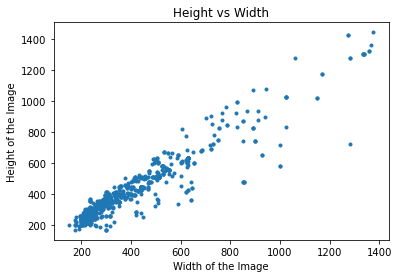

In [9]:
_ = plt.plot(df.width, df.height, marker = '.', linestyle = 'None')
_ = plt.xlabel("Width of the Image")
_ = plt.ylabel("Height of the Image")
_ = plt.title("Height vs Width")
plt.show()

### As per above plot, it looks like a large number of the images are below 700 X 700 Dimensions.